# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno
import re
import math
from sklearn.impute import SimpleImputer
from sklearn import linear_model

##import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score 
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.preprocessing import OneHotEncoder

##import models(Naive Bayes, Logistic Regression, Bagging, Random Forest)
##(Adaboost, Gradient Boost, decision Trees and SVM classifier )
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib import style
#plt.style.use('bmh')
#plt.style.use('seaborn-notebook')

from matplotlib.ticker import StrMethodFormatter

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../input/titanic/train.csv').copy()
test = pd.read_csv('../input/titanic/test.csv').copy()

# **Exploratory Data Analysis**

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
df = train.append(test)

In [8]:
df.shape

(1309, 12)

In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
missing_value='S'
df.Embarked.fillna(missing_value,inplace=True)


In [11]:
df.Fare.fillna(df.Fare.mean(), inplace=True)

In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

<AxesSubplot:>

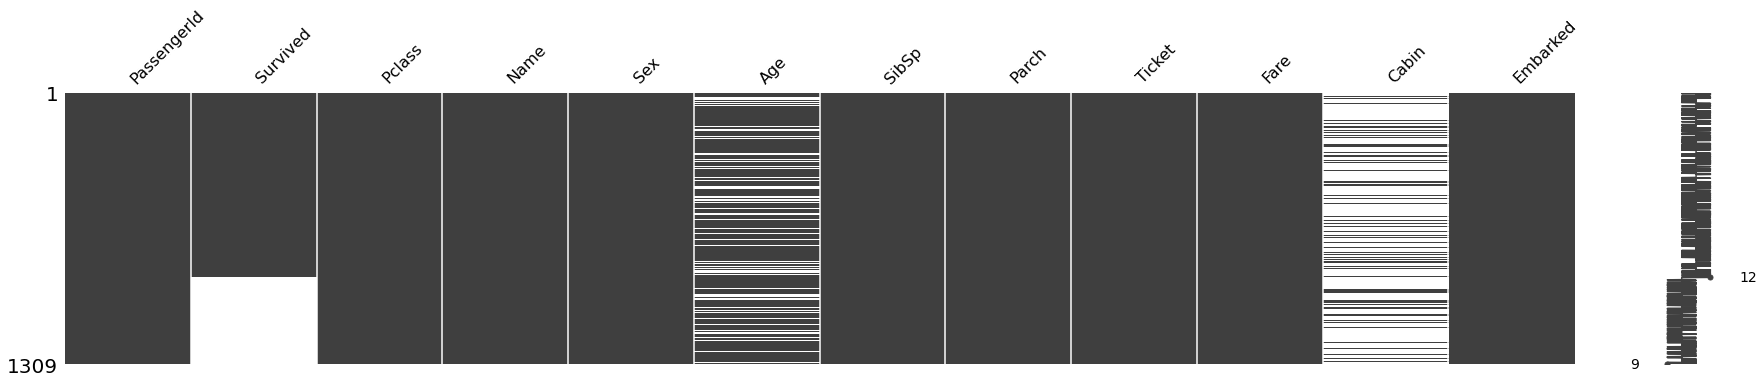

In [13]:
missingno.matrix(df,figsize=(30,5))

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.738879
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


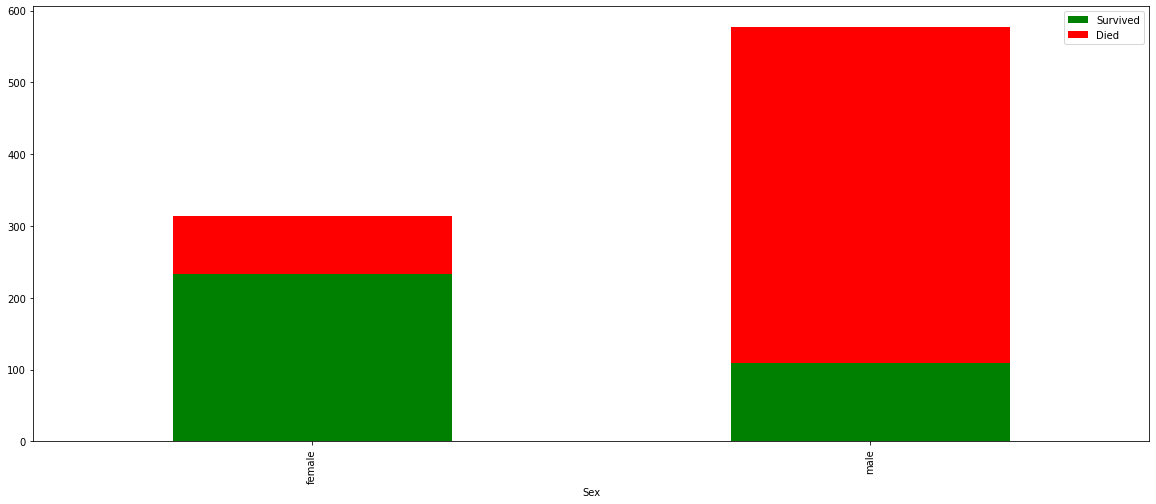

In [16]:
#Let's visualize survival based on the gender.

df['Died'] = 1 - df['Survived']
df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(20, 8),
                                                          stacked=True, color=['g', 'r']);

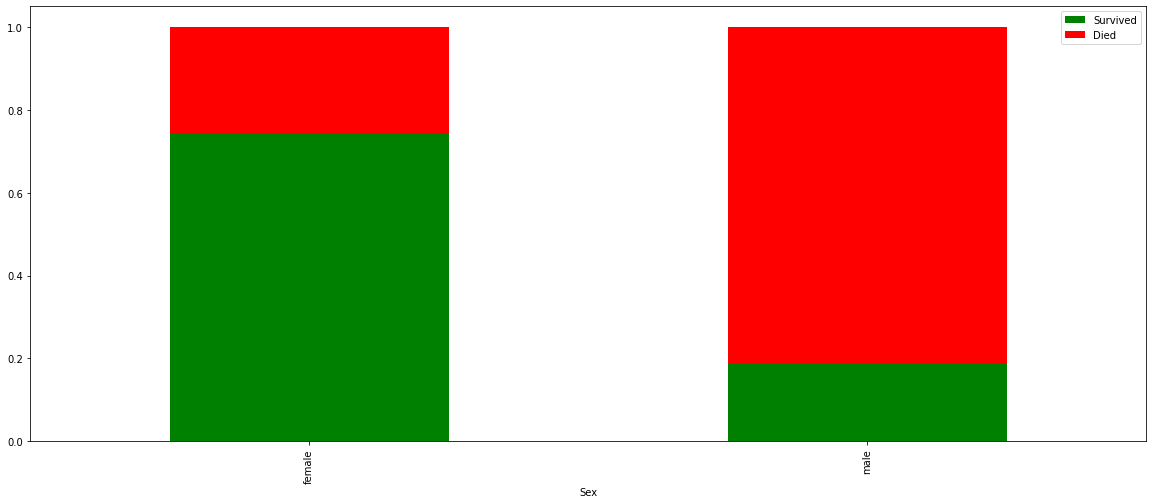

In [17]:
#Let's plot the same graph but with ratio instead.

df.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(20, 8), 
                                                           stacked=True, color=['g', 'r']);

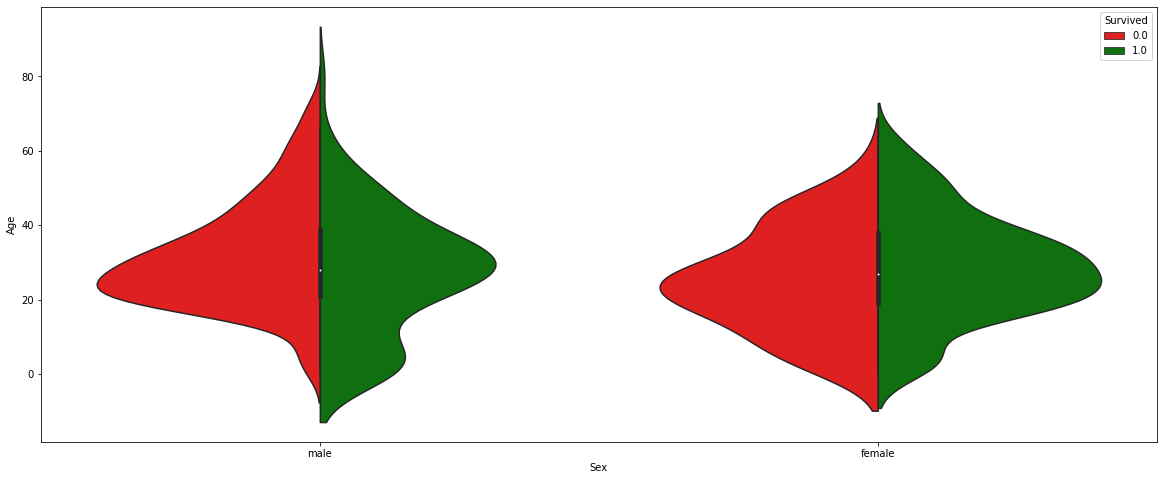

In [18]:
#Let's now correlate the survival with the age variable.

fig = plt.figure(figsize=(20, 8))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=df, 
               split=True,
               palette={0: "r", 1: "g"}
              );

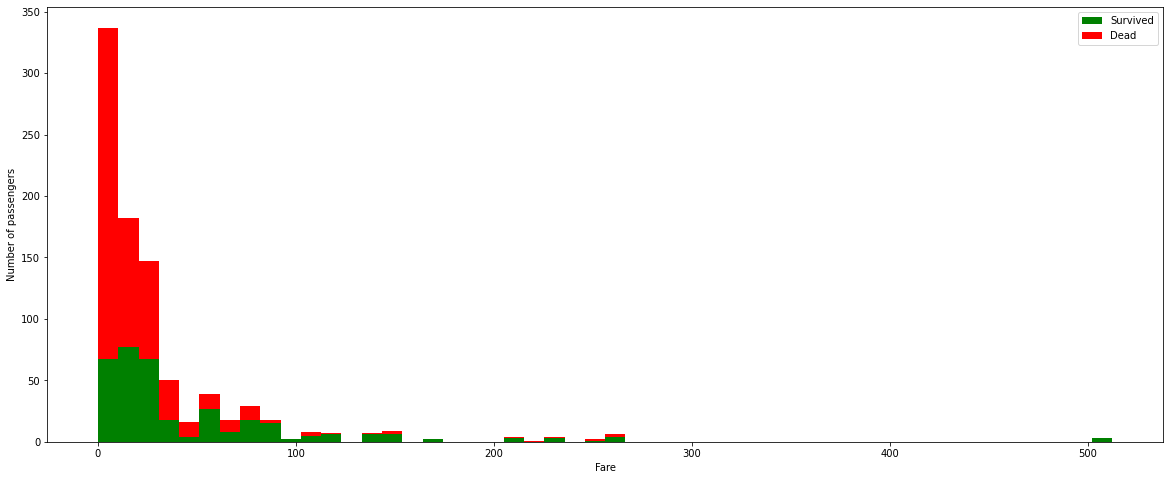

In [19]:
#Let's now focus on the Fare ticket of each passenger and see how it could impact the survival.

figure = plt.figure(figsize=(20, 8))
plt.hist([df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

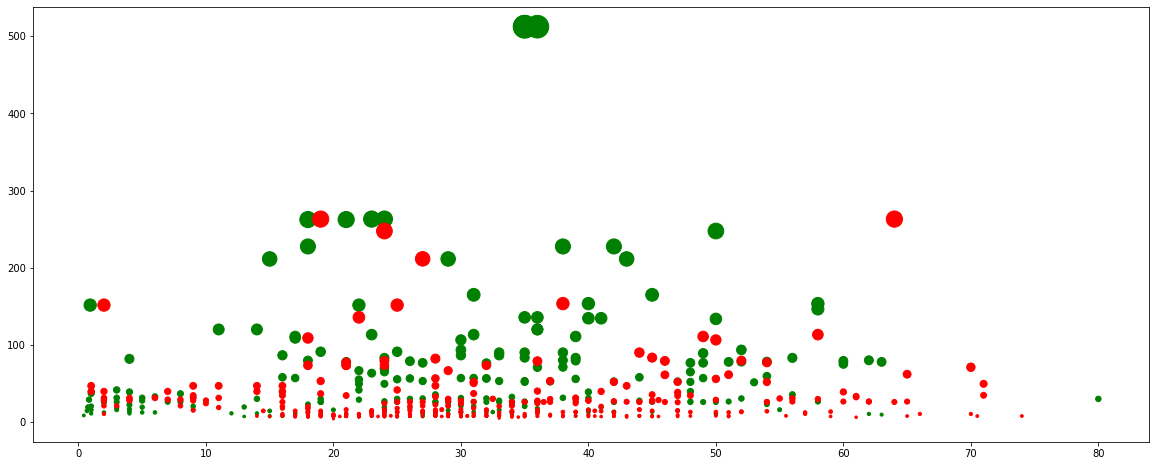

In [20]:
#Let's now combine the age, the fare and the survival on a single chart.

plt.figure(figsize=(20, 8))
ax = plt.subplot()

ax.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'], 
           c='green', s=df[df['Survived'] == 1]['Fare'])
ax.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], 
           c='red', s=df[df['Survived'] == 0]['Fare']);

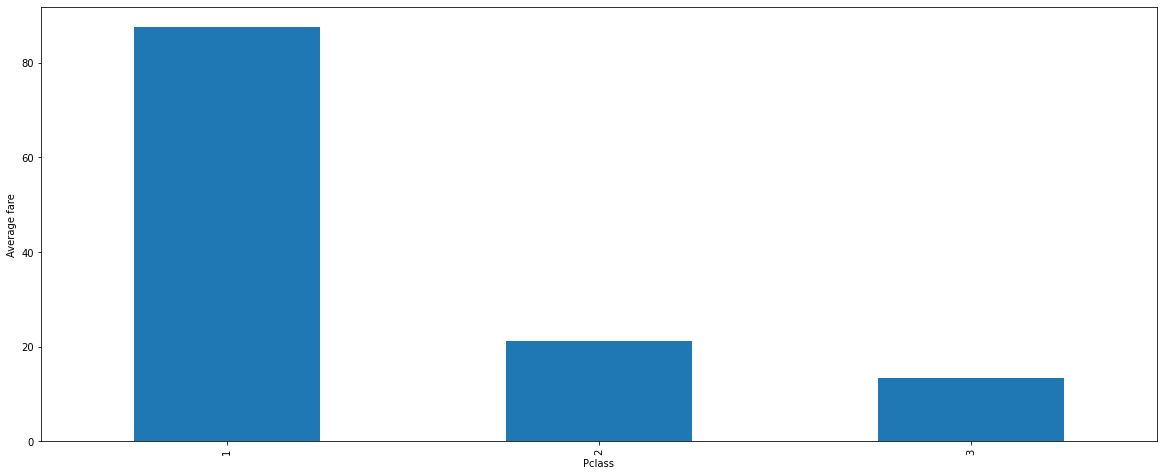

In [21]:
#the ticket fare correlates with the class as we see it in the chart below.

ax = plt.subplot()
ax.set_ylabel('Average fare')
df.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(20, 8), ax = ax);

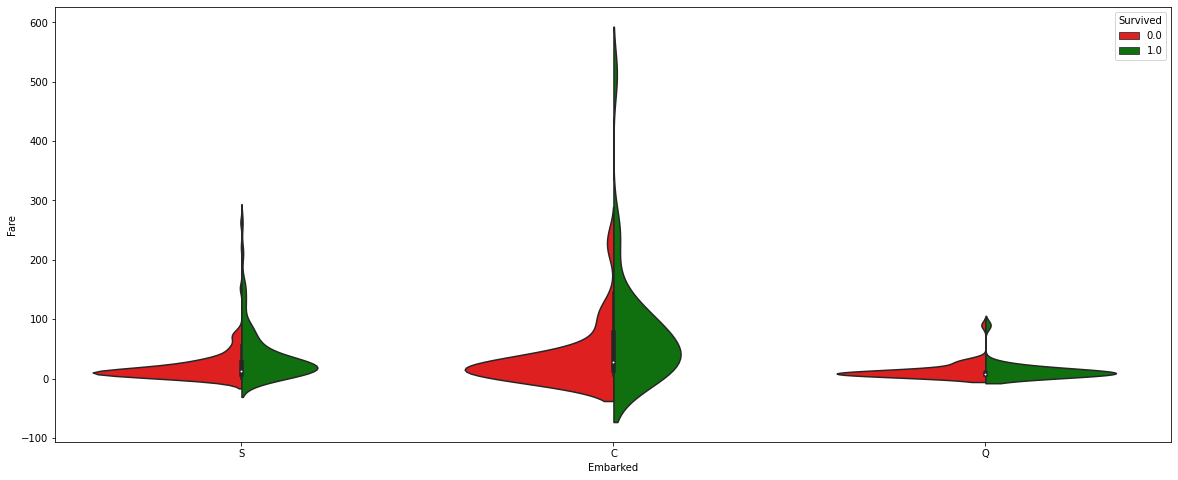

In [22]:
#Let's now see how the embarkation site affects the survival.

fig = plt.figure(figsize=(20, 8))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=df, split=True, palette={0: "r", 1: "g"});

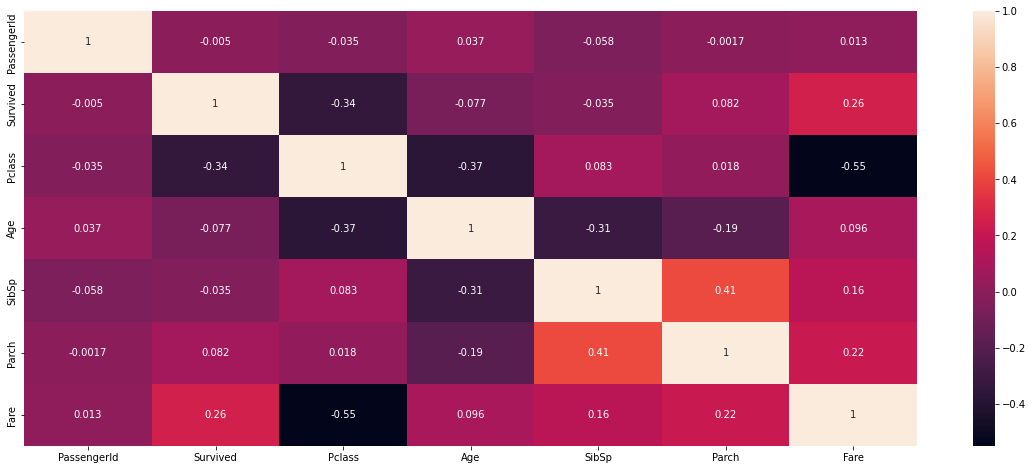

In [23]:
plt.figure(figsize=(20,8))
corr_mat=train.corr()
sns.heatmap(corr_mat, color = 'b', annot=True)
plt.show()

# **Feature Engineering**

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [25]:
# Numerical columns
#     fare, sibsp, parch, age, pclass

# Categorical columns
#     sex, embarked

In [26]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Died            418
dtype: int64

In [27]:
def get_titles():

    global df
    
    # we extract the title from each name
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "the Countess":"Royalty",
                        "Lady" :      "Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Ms":         "Mrs",
                        "Mrs" :       "Mrs",
                        "Mr" :        "Mr",
                        "Mlle":       "Miss",
                        "Miss" :      "Miss",
                        "Master" :    "Master"         

                        }
    
    # we map each title
    df['Title'] = df.Title.map(Title_Dictionary)
    print('Titles processed...')

In [28]:
get_titles()

Titles processed...


In [29]:
grouped_train = df.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()

grouped_test = df.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [30]:
grouped_median_train

PassengerId  Survived   Age  SibSp  Parch       Fare  \
Sex    Pclass Title                                                           
female 1      Miss           369.0       1.0  30.0    0.0    0.0   88.25000   
              Mrs            499.0       1.0  40.0    1.0    0.0   79.20000   
              Officer        797.0       1.0  49.0    0.0    0.0   25.92920   
              Royalty        658.5       1.0  40.5    0.5    0.0   63.05000   
       2      Miss           437.5       1.0  24.0    0.0    0.0   13.00000   
              Mrs            439.5       1.0  31.5    1.0    0.0   26.00000   
       3      Miss           372.0       0.5  18.0    0.0    0.0    8.75625   
              Mrs            405.5       0.5  31.0    1.0    1.0   15.97500   
male   1      Master         446.0       1.0   4.0    1.0    2.0  120.00000   
              Mr             463.0       0.0  40.0    0.0    0.0   42.40000   
              Officer        648.0       0.0  51.0    0.0    0.0   35.50000   
              Royalty        600.0       0.0  40.0    0.0    0.0   27.72080   
       2      Master         408.0       1.0   1.0    1.0    1.0   26.00000   
              Mr             440.0       0.0  31.0    0.0    0.0   13.00000   
              Officer        358.5       0.0  46.5    0.0    0.0   13.00000   
       3      Master         270.5       0.0   4.0    3.5    1.0   28.51250   
              Mr             472.0       0.0  26.0    0.0    0.0    7.89580   

                       Died  
Sex    Pclass Title          
female 1      Miss      0.0  
              Mrs       0.0  
              Officer   0.0  
              Royalty   0.0  
       2      Miss      0.0  
              Mrs       0.0  
       3      Miss      0.5  
              Mrs       0.5  
male   1      Master    0.0  
              Mr        1.0  
              Officer   1.0  
              Royalty   1.0  
       2      Master    0.0  
              Mr        1.0  
              Officer   1.0  
       3      Master    1.0  
              Mr        1.0

In [31]:
def process_age():
    
    global df
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    df.head(891).Age = df.head(891).apply(lambda r : fillAges(r, grouped_median_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    df.iloc[891:].Age = df.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    

In [32]:
process_age()

In [33]:
titles = {"Officer":0, "Royalty":1,  "Mr":2, "Mrs":3, "Miss":4, "Master":5}

df['Title'] = df['Title'].map(titles)

In [34]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Died            418
Title             0
dtype: int64

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,4
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,2


In [36]:
df['Family_size']=df['Parch']+df['SibSp']+1

In [37]:
df['Family_size'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

In [38]:
# introducing other features based on the family size
df['Singleton'] = df['Family_size'].map(lambda s: 1 if s == 1 else 0)
df['SmallFamily'] = df['Family_size'].map(lambda s: 1 if 2<=s<=3 else 0)
df['Mid_Sized_Family'] = df['Family_size'].map(lambda s: 1 if 4<=s<=6 else 0)
df['LargeFamily'] = df['Family_size'].map(lambda s: 1 if 7<=s else 0)

In [39]:
ports={'S':0,'C':1,'Q':2}
# for data in df:
df['Embark']=df['Embarked'].map(ports)

In [40]:
df['Sex'] = df['Sex'].apply(lambda x:0 if x=='female' else 1)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title,Family_size,Singleton,SmallFamily,Mid_Sized_Family,LargeFamily,Embark
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,2,2,0,1,0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,3,2,0,1,0,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,4,1,1,0,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,3,2,0,1,0,0,0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1.0,2,1,1,0,0,0,0


In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title,Family_size,Singleton,SmallFamily,Mid_Sized_Family,LargeFamily,Embark
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,2,2,0,1,0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,3,2,0,1,0,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,4,1,1,0,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,3,2,0,1,0,0,0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1.0,2,1,1,0,0,0,0


In [43]:
object_cols = ['Embark', 'Pclass']

# encoding in dummy variable
Embark_dummies = pd.get_dummies(df['Embark'], prefix='Embark')
df = pd.concat([df, Embark_dummies], axis=1)
    
# removing the embark variable
df.drop('Embark', axis=1, inplace=True)


# encoding in dummy variable
Pclass_dummies = pd.get_dummies(df['Pclass'], prefix='Pclass')
df = pd.concat([df, Pclass_dummies], axis=1)
    
# removing the pclass variable
df.drop('Pclass', axis=1, inplace=True)



# encoding in dummy variable
Pclass_dummies = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, Pclass_dummies], axis=1)
    
# removing the pclass variable
df.drop('Title', axis=1, inplace=True)

In [44]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embark_2,Pclass_1,Pclass_2,Pclass_3,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,1,0,0,1,0,0,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,...,0,1,0,0,0,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,1,0,0,0,0,1,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,...,0,1,0,0,0,0,0,1,0,0
4,5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,...,0,0,0,1,0,0,1,0,0,0


In [45]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Cabin', 'Family_size', 
         'SibSp', 'Parch', 'Died', 'Survived'], inplace=True, axis=1) 

In [46]:
# # Columns that will be one-hot encoded
# low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# # Columns that will be dropped from the dataset
# high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

# print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
# print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)


In [47]:
# # Apply one-hot encoder to each column with categorical data
# object_cols = ['Title', 'Embarked', 'Pclass']

# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
# OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# # One-hot encoding removed index; put it back
# OH_cols_train.index = X_train.index
# OH_cols_valid.index = X_valid.index

# # Remove categorical columns (will replace with one-hot encoding)
# num_X_train = X_train.drop(object_cols, axis=1)
# num_X_valid = X_valid.drop(object_cols, axis=1)

# # Add one-hot encoded columns to numerical features
# OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
# OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

Fare
4.369374593951007


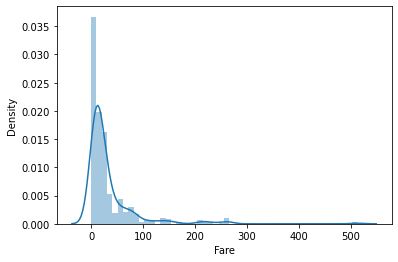

Age
0.5132689142866586


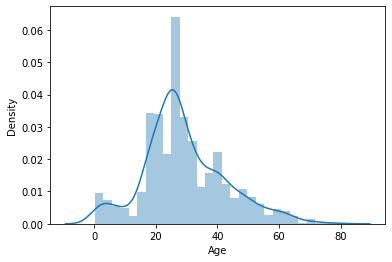

In [48]:
cols = ['Fare', 'Age']

for col in df[cols]:
    print(col)
    print(df[col].skew())
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [49]:
skewed_cols = ['Fare', 'Age']


In [50]:
for col in skewed_cols:
    df[col] = np.log1p(df[col])

In [51]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

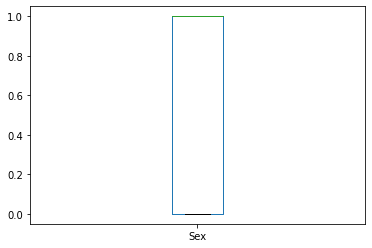

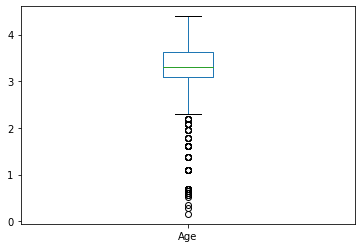

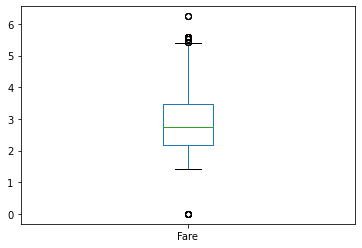

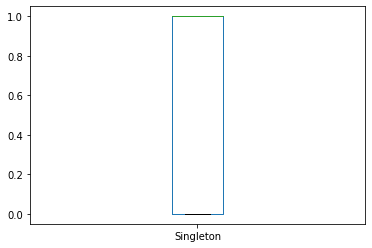

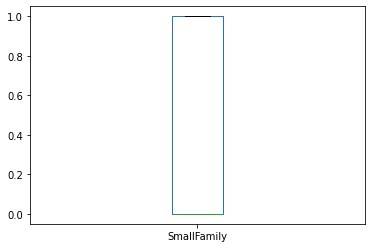

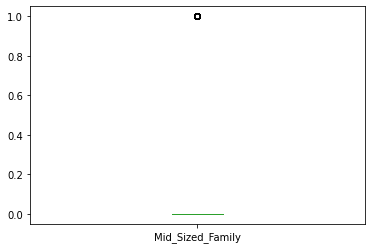

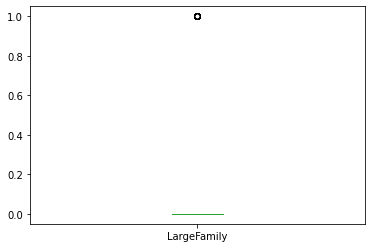

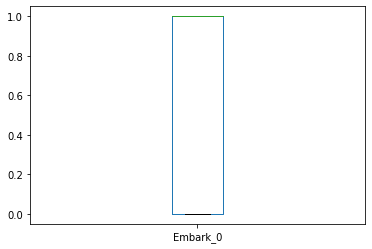

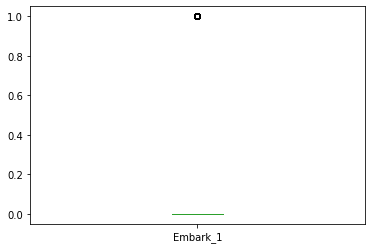

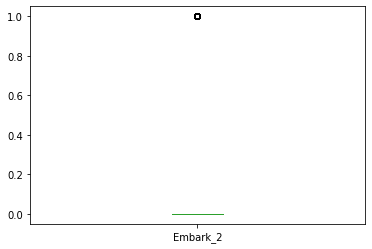

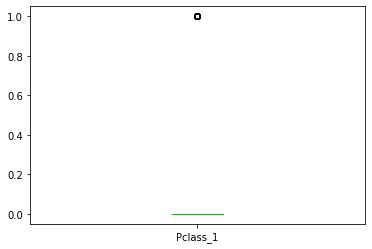

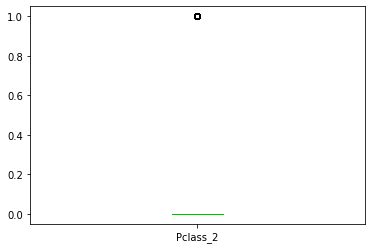

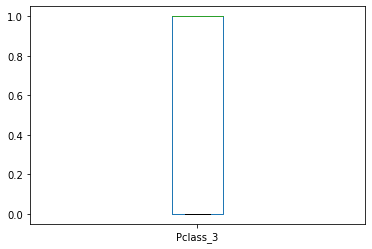

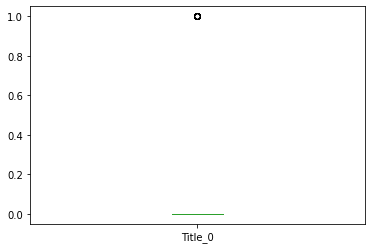

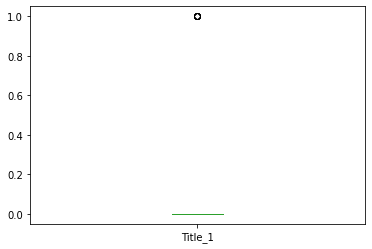

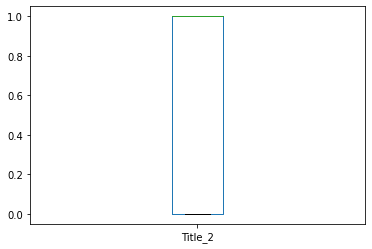

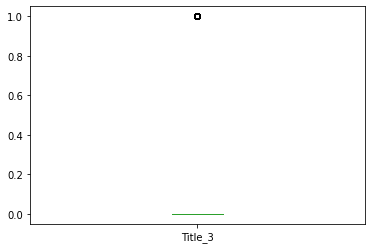

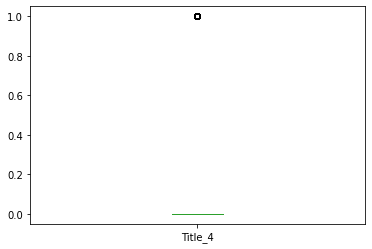

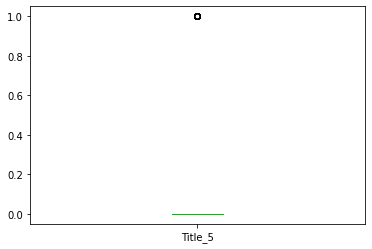

In [52]:
#Plot all outliers columnwise
for col in df.columns:
    plot_boxplot(df,col)

In [53]:
def remove_outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR= Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[ft] = np.where(df[ft]>upper_bound,upper_bound,np.where(df[ft]<lower_bound,lower_bound,df[ft])).astype(int)   

In [54]:
#Replacing all outliers
for col in df.columns:
    remove_outliers(df,col)
    
#Replacing all outliers
# for col in test_df.columns:
#     remove_outliers(test_df,col)

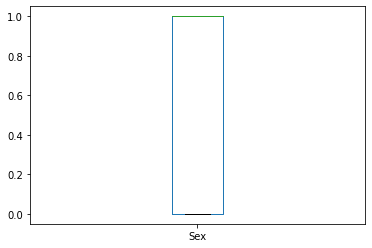

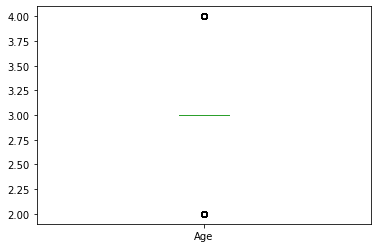

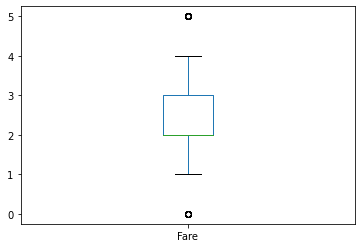

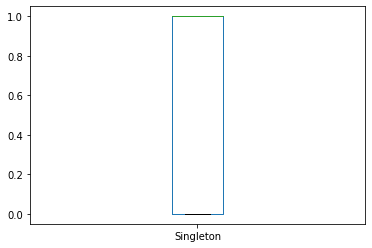

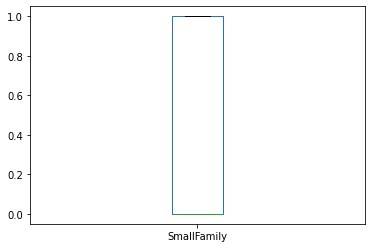

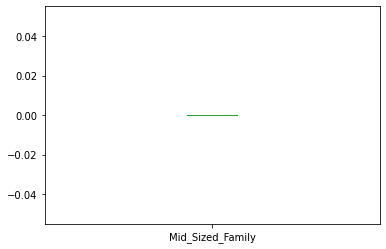

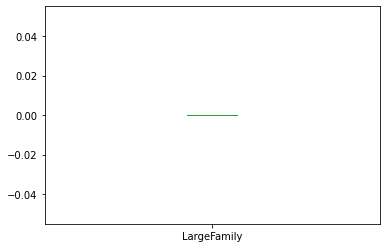

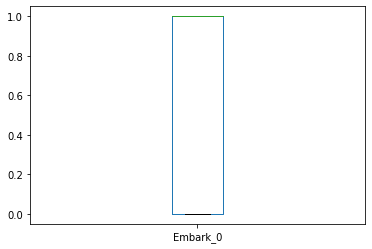

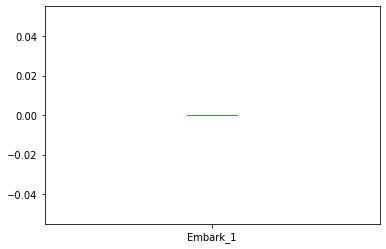

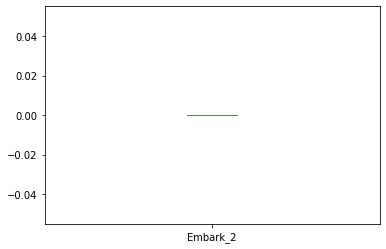

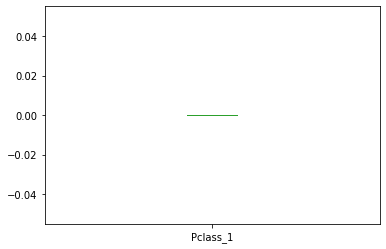

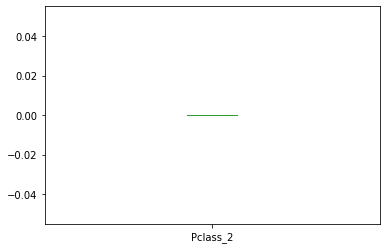

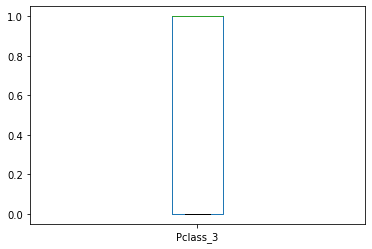

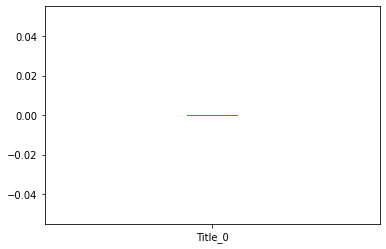

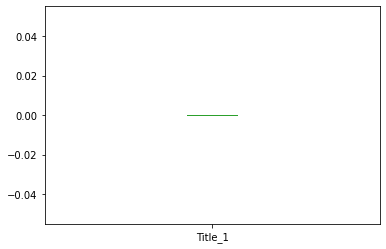

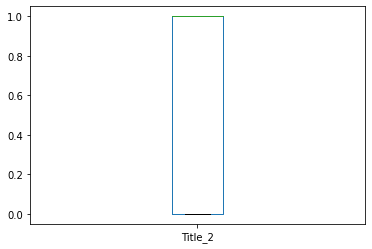

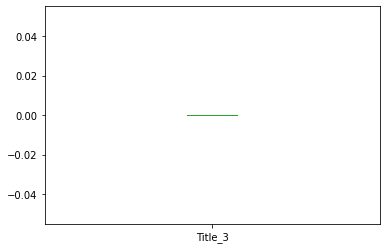

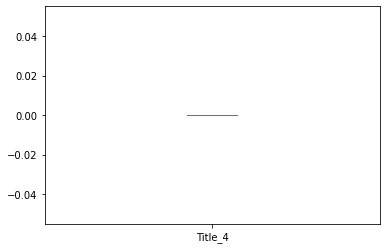

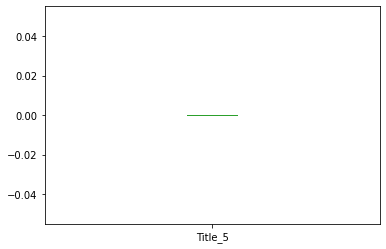

In [55]:
for col in df.columns:
    plot_boxplot(df,col)

In [56]:
# from sklearn.impute import SimpleImputer

# # Imputation
# my_imputer = SimpleImputer()
# imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
# imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# # Imputation removed column names; put them back
# imputed_X_train.columns = X_train.columns
# imputed_X_valid.columns = X_valid.columns

In [57]:
# # Get number of unique entries in each column with categorical data
# object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
# d = dict(zip(object_cols, object_nunique))

# # Print number of unique entries by column, in ascending order
# sorted(d.items(), key=lambda x: x[1])

In [58]:
# # Get list of categorical variables
# s = (X_train.dtypes == 'object')
# object_cols = list(s[s].index)

# print("Categorical variables:")
# print(object_cols)

In [59]:
df.head()

,Sex,Age,Fare,Singleton,SmallFamily,Mid_Sized_Family,LargeFamily,Embark_0,Embark_1,Embark_2,Pclass_1,Pclass_2,Pclass_3,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,3,2,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1,0,3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,3,2,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [60]:
cols_to_scale = ['Age', 'Fare']

for col in cols_to_scale:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])
    #test_df[col] = scaler.fit_transform(test_df[[col]])

In [61]:
target = train.Survived
train_df=df.head(891)
test_df=df.iloc[891:,:]

In [62]:
train_df.head()

,Sex,Age,Fare,Singleton,SmallFamily,Mid_Sized_Family,LargeFamily,Embark_0,Embark_1,Embark_2,Pclass_1,Pclass_2,Pclass_3,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0.5,0.4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1,0,0.5,0.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.5,0.4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0.5,0.6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0.5,0.4,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [63]:
test_df.head()

,Sex,Age,Fare,Singleton,SmallFamily,Mid_Sized_Family,LargeFamily,Embark_0,Embark_1,Embark_2,Pclass_1,Pclass_2,Pclass_3,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0.5,0.4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0.5,0.4,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,1.0,0.4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0.5,0.4,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,0,0.5,0.4,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [64]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel
# clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
# clf = clf.fit(train_df, target)

In [65]:
# features = pd.DataFrame()
# features['feature'] = train_df.columns
# features['importance'] = clf.feature_importances_
# features.sort_values(by=['importance'], ascending=True, inplace=True)
# features.set_index('feature', inplace=True)

In [66]:
# features.plot(kind='barh', figsize=(18, 15))

In [67]:
# model = SelectFromModel(clf, prefit=True)
# train_reduced = model.transform(train_df)
# train_reduced.shape

In [68]:
# test_reduced = model.transform(test_df)
# test_reduced.shape

In [69]:
# X=train_df.copy()
# y=train['Survived'].values

In [70]:
X_train = train_df
y_train = train["Survived"]
X_test  = test_df

# **Modelling**

In [71]:
import time
from datetime import datetime, timedelta, date
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [72]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)

    #Cross-validation
    train_pred = cross_val_predict(algo, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    n_jobs=-1)

    #Cross-validation accuracy metric
    acc_cv = round(accuracy_score(y_train, train_pred) * 100, 2)

    return train_pred, acc, acc_cv, model

In [73]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt, model_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % timedelta(seconds=dt_time))

Accuracy: 85.19
Accuracy CV 10-Fold: 81.59
Running Time: 0:00:01.856958


In [74]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian, model_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % timedelta(seconds=gaussian_time))

Accuracy: 79.8
Accuracy CV 10-Fold: 78.79
Running Time: 0:00:00.071770


In [75]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt, model_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % timedelta(seconds=gbt_time))

Accuracy: 83.84
Accuracy CV 10-Fold: 81.48
Running Time: 0:00:00.610243


In [76]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn, model_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % timedelta(seconds=knn_time))

Accuracy: 83.16
Accuracy CV 10-Fold: 79.12
Running Time: 0:00:00.193548


In [77]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc, model_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % timedelta(seconds=linear_svc_time))

Accuracy: 80.36
Accuracy CV 10-Fold: 80.25
Running Time: 0:00:00.167093


In [78]:
#Logistic regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log, model_log = fit_ml_algo(LogisticRegression(),
                                                  X_train,
                                                  y_train,
                                                  10)
log_time = (time.time()- start_time)
print('Accuracy: %s' % acc_log)
print('Accuracy CV 10-Fold: %s' % acc_cv_log)
print('Running Time: %s' % timedelta(seconds=log_time))

Accuracy: 80.7
Accuracy CV 10-Fold: 80.92
Running Time: 0:00:00.200808


In [79]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd, model_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % timedelta(seconds=sgd_time))

Accuracy: 81.71
Accuracy CV 10-Fold: 76.54
Running Time: 0:00:00.175977


In [80]:
#Random forest
start_time = time.time()
train_pred_rf, acc_rf, acc_cv_rf, model_rf = fit_ml_algo(RandomForestClassifier(n_estimators=100,oob_score=True), 
                                                  X_train, 
                                                  y_train,
                                                  10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % timedelta(seconds=rf_time))

Accuracy: 85.19
Accuracy CV 10-Fold: 81.71
Running Time: 0:00:01.516427


In [81]:
#Perceptron
start_time = time.time()
train_pred_per, acc_per, acc_cv_per, model_per = fit_ml_algo(Perceptron(max_iter=5), 
                                                  X_train, 
                                                  y_train,
                                                  10)
per_time = (time.time() - start_time)
print("Accuracy: %s" % acc_per)
print("Accuracy CV 10-Fold: %s" % acc_cv_per)
print("Running Time: %s" % timedelta(seconds=per_time))

Accuracy: 81.14
Accuracy CV 10-Fold: 78.79
Running Time: 0:00:00.164164


In [82]:
#Adaboost
start_time = time.time()
dtree=DecisionTreeClassifier()
train_pred_adb, acc_adb, acc_cv_adb, model_adb = fit_ml_algo(
                                                  AdaBoostClassifier(n_estimators=100, base_estimator=dtree, learning_rate=1), 
                                                  X_train, 
                                                  y_train,
                                                  10)
adb_time = (time.time() - start_time)
print("Accuracy: %s" % acc_adb)
print("Accuracy CV 10-Fold: %s" % acc_cv_adb)
print("Running Time: %s" % timedelta(seconds=adb_time))

Accuracy: 85.19
Accuracy CV 10-Fold: 81.26
Running Time: 0:00:01.366189


In [83]:
#XGBoost
start_time = time.time()
train_pred_xgb, acc_xgb, acc_cv_xgb, model_xgb = fit_ml_algo(
                                                  XGBClassifier(learning_rate=0.001, max_depth=1, n_estimators=100), 
                                                  X_train, 
                                                  y_train,
                                                  10)
xgb_time = (time.time() - start_time)
print("Accuracy: %s" % acc_xgb)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb)
print("Running Time: %s" % timedelta(seconds=xgb_time))

Accuracy: 78.23
Accuracy CV 10-Fold: 78.0
Running Time: 0:00:02.429928


In [84]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
# cat_features = X_train.columns
cat_features

array([ 0,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [85]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)


NameError: name 'Pool' is not defined

In [ ]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

In [ ]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


In [ ]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

In [ ]:
def ANN(X_train, y_train, loss, weights):
    model = keras.sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu')
        keras.layers.Dense(15, activation='relu')
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimiser='Adam', loss=loss, metrics='accuracy')
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    #print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    #print('Classification Report: \n', classification_report(y_test,y_preds))
    return y_preds
    

In [ ]:
ANN_y_preds = ANN(X_train, y_train, 'binary_crossentropy', -1)

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'
              #,'CatBoost'
             ],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        #acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
result_df = models.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

In [ ]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'
              #,'CatBoost'
             ],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
        #,acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_result_df = cv_models.sort_values(by='Score', ascending=False)
cv_result_df = cv_result_df.set_index('Score')
cv_result_df

In [ ]:
"""#Best Model
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)"""

In [ ]:
# Make a prediction using the Gradient boost
prediction_gb = model_gbt.predict(X_test)

In [ ]:
# Make a prediction using the Gradient boost
prediction_dt = model_dt.predict(X_test)

In [ ]:
# Make a prediction using the Gradient boost
prediction_knn = model_knn.predict(X_test)

In [ ]:
output = prediction_gb
df_output = pd.DataFrame()
aux = test.copy()
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('Submission_gb.csv',index=False)

In [ ]:
output = y_prediction
df_output = pd.DataFrame()
aux = test.copy()
submission['ID'] = aux['PassengerId']
submission['Response'] = output
submission[['ID','Response']].to_csv('name.csv',index=False)

In [ ]:
# Let's convert our submission dataframe 'Response' column to ints
submission['Response'] = submission['Response'].astype(int)
print('Converted Response column to integers.')

In [ ]:
pd.read_csv('Submission.csv')

In [ ]:
rfecv = RFECV(estimator=clf_lr, step=1, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
print('Optimal number of features:', rfecv.n_features)
print('Best features:', X_train.columns[rfecv.support])

In [ ]:
rfecv.grid_scores_

In [ ]:
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score of number of selcted features')
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [ ]:
def generate_accuracy_scores(model, X, y):
    ac = accuracy_score(y, model.predict(X))
    f_score = f1_score(y, model.predict(X))
    print('Accuracy is:', ac)
    print('F1 score is:', f_score)
    print('\n')
    print(pd.crosstab(pd.Series(model.predict(X), name='Predicted'), pd.Series(y['outcome'], name='Actual')))

In [ ]:
#Stochastic gradient descent

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [ ]:
#Random forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100,oob_score=True)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [ ]:
#Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [ ]:
#KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [ ]:
#Perceptron

In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [ ]:
#Linear SVM

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [ ]:
#Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [ ]:
#Best Model

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

In [ ]:
output = Y_prediction
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('Submission.csv',index=False)

In [ ]:
pd.read_csv('Submission.csv')